In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State hypotheses.    
>$H_0:$ She is unable to discriminate between the cups where the milk or the tea were added first.   
>$H_a:$ She is able to distinguish which cups had the milk/tea poured first.

Step 2: Determine/calculate test statistic.    
>$\hat{p}:$ The number of correctly discriminated tea-first cups.    
>$\hat{p} = 3$

Step 3: Test $\hat{p}$ under $H_0$, and calculate a p-value.

>The lady is sampling without replacement from a finite population with a discrete number of "success" items in the sample. Therefore, under $H_0$, this can be modeled as a hypergeometric distribution (`stats.hypergeom`). Specifically:     
>>Number of items in the population: $M=8$     
>>Number of "success" items in the population (number of tea-first cups): $n=4$     
>>Number of cups she tests: $N=4$

In [11]:
stats.hypergeom.rvs(8,4,4,size=5)

array([3, 2, 2, 2, 1])

>So, under $H_0$, what is $P(X\geq 3)$?  
$P(X\geq 3) = 1 - P(X \leq 2)$

In [14]:
1-stats.hypergeom.cdf(2,8,4,4)

0.24285714285714288

Step 4: Conclude.    
>With a p-value of 0.243, we fail to reject $H_0$. Therefore, there is insufficient evidence to claim that she is any more able to distinguish between which cups had tea or milk poured first than random chance would allow.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [16]:
iris=Table().read_table("Data/iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State hypotheses.    
>$H_0$: The virginica and versicolor have identical mean sepal widths.   
>$H_a$: The virginica species has a larger mean sepal width than the versicolor.

Step 2: Determine/calculate test statistic.  
>$\hat{p}$: The difference in mean sepal width between virginica and versicolor species.    
>$\hat{p} = 2.974-2.77 = 0.204$

Step 3: Test $\hat{p}$ under $H_0$, and calculate a $p$-value.

In [17]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs
iris_sub

species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


If $H_0$ were true, then it wouldn't matter which species any given sepal width was assigned to, i.e. if there were no difference, then taking the difference of any two items would be equivalent, regardless of their actual "species." Thus, we create an empirical distribution by shuffling our sample and taking differences between the mean sepal widths of the top and bottom halves of the sample rows. 

In [71]:
####WORK ON THIS####
ts = []
#for i in np.arange(10000):
vals = iris_sub.sample(with_replacement=False).column(1)
vals

array([2.2, 2.8, 3. , 2.9, 2. , 2.6, 3.8, 2.9, 2.8, 3.4, 2.5, 2.5, 3.2,
       2.7, 3.3, 2.8, 3.3, 2.3, 3. , 3.2, 2.8, 2.5, 2.5, 3.1, 3.2, 3. ,
       2.8, 2.3, 3.2, 3. , 3. , 2.9, 2.7, 2.8, 2.7, 2.2, 2.5, 2.7, 3. ,
       3. , 3.6, 2.7, 2.8, 3. , 2.6, 2.9, 3. , 2.7, 2.8, 2.7, 2.8, 3.3,
       2.2, 3. , 2.8, 2.8, 2.8, 2.6, 3.4, 2.4, 2.4, 2.9, 2.8, 3. , 3.1,
       2.4, 3. , 2.9, 3.4, 2.9, 2.5, 3.2, 2.6, 2.7, 3. , 2.5, 3. , 3.3,
       3. , 3. , 2.6, 3.1, 2.3, 3. , 3. , 3.1, 2.9, 3.2, 3.1, 2.9, 2.5,
       3.8, 3.1, 3.2, 3. , 2.8, 3. , 2.7, 3.1, 3.2])

In [70]:
diffs = np.mean(np.diff(vals[:10]))
diffs

-0.07777777777777775

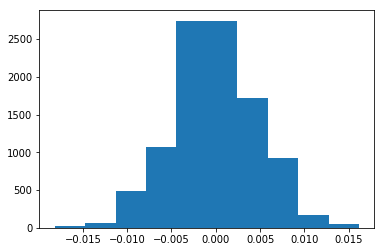

In [38]:
plt.hist(ts)
plt.show()

Step 4: ...